## Решение ДЗ

In [60]:
import pandas as  pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [61]:
df = pd.read_csv ('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# попробуем выбрать какие-нибудь признаки создадим сразу два набора, причем второй дополним двумя полями к первому


In [62]:
## добавим во второй датасет еще одно поле
selectedColumns = df[ [ 'age', 'education', 'gender','income' ] ]
selectedColumns2 = df[['workclass','age', 'education', 'gender','income']]

X = pd.get_dummies( selectedColumns, columns = [ 'gender' , 'education'] )
X2 = pd.get_dummies( selectedColumns2, columns = [ 'workclass','gender' , 'education'] )

# столбец income является целевой переменной, удаляем его из X
del X['income']
del X2['income']

X2.head()




,age,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,28,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,44,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,18,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit( df['income'] )
##le.classes_
le.transform( [ '<=50K','>50K' ] )


array([0, 1], dtype=int64)

In [64]:
y = pd.Series( data = le.transform( df['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [65]:
model = LogisticRegression()

In [66]:
# обучаем модель первую модель

model.fit( X, y )
predictions = model.predict_proba( X ) 

In [67]:
###list(zip( predictions[:, :], y ))   

In [68]:
model.score(X, y)

0.7965890012693992

In [69]:
## обучаем вторую модель
model2 =  LogisticRegression()

In [70]:
model2.fit( X2, y )
predictions2 = model2.predict_proba( X2 ) 

In [71]:
model2.score(X2, y)

0.7993734900290733

# Получили примерно одинаковую точность. 

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [73]:
roc_auc_score(y, predictions[:, 1] )


0.8021012988067846

In [74]:
roc_auc_score(y, predictions2[:, 1] )


0.8087552823473461

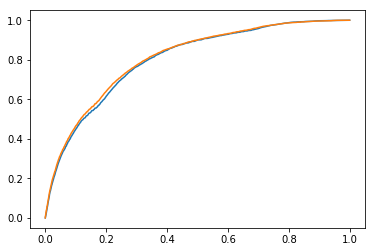

In [75]:
fpr, tpr, thres = roc_curve( y, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( y, predictions2[:, 1] )

plt.plot( fpr, tpr )
plt.plot( fpr2, tpr2 )

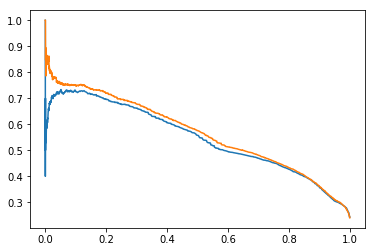

In [76]:
pr, re, thres = precision_recall_curve( y, predictions[:, 1] )
pr2, re2, thres2 = precision_recall_curve( y, predictions2[:, 1] )

plt.plot( re, pr )
plt.plot( re2, pr2 )
### лучшая модель та, которая захватвает большую площадь

## вторая модель чуть лучше)

In [78]:
average_precision_score( y, predictions[:, 1] )


0.5476766823150362

In [79]:
average_precision_score( y, predictions2[:, 1] )

0.5676693971438057